In [29]:
### Step 1: Import Packages

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("fraudTest.csv")
df.drop('Unnamed: 0', axis =1)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [32]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop"]]
df_select.columns

Index(['trans_date_trans_time', 'category', 'amt', 'city_pop'], dtype='object')

In [33]:
type(df_select["trans_date_trans_time"][0])

str

In [34]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

<ipython-input-34-99f721e4ce0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])


In [35]:
df_select["trans_date_trans_time"]

0        2020-06-21 12:14:25
1        2020-06-21 12:14:33
2        2020-06-21 12:14:53
3        2020-06-21 12:15:15
4        2020-06-21 12:15:17
                 ...        
555714   2020-12-31 23:59:07
555715   2020-12-31 23:59:09
555716   2020-12-31 23:59:15
555717   2020-12-31 23:59:24
555718   2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 555719, dtype: datetime64[ns]

In [36]:
df_select["time_var"] = [i.month for i in df_select["trans_date_trans_time"]]

<ipython-input-36-b1a497fe803c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.month for i in df_select["trans_date_trans_time"]]


In [37]:
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time"], axis = 1)
y = df["is_fraud"]

In [38]:
X.head()

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [39]:
## Step 2: Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [79]:
X_test.head(3)

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
102051,218.76,3285,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0
270705,48.83,95,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0
308877,70.86,1201,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [41]:
## Step 3: Make three sets of training data (Oversample, Undersample and SMOTE)

In [42]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [56]:
# Oversample

ros = RandomOverSampler(random_state = 0)
ros.fit(X_train,y_train)
X_over, y_over = ros.fit_resample(X_train, y_train)

In [57]:
# Undersample 

rus = RandomUnderSampler(random_state = 0)
rus.fit(X_train,y_train)
X_under, y_under = rus.fit_resample(X_train, y_train)

In [58]:
# SMOTE

oversample = SMOTE(random_state = 0)
X_SMOTE, y_SMOTE = oversample.fit_resample(X_train,y_train)

In [59]:
## Step 4: Train Three Logistic Regression Models

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
logistic = LogisticRegression()
scalar = StandardScaler()
pipe = Pipeline(steps = [("scalar", scalar), ("model", logistic)])
pipe

Pipeline(steps=[('scalar', StandardScaler()), ('model', LogisticRegression())])

In [61]:
# Oversample Model

lasso_over = pipe.fit(X_over, y_over)

In [62]:
# Undersample Model

lasso_under = pipe.fit(X_under, y_under)

In [63]:
# SMOTE

lasso_SMOTE = pipe.fit(X_SMOTE, y_SMOTE)

In [64]:
## Step 5: Test the Models

In [68]:
pred_over = lasso_over.predict(X_test)
print(classification_report(y_test,pred_over))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    110716
           1       0.11      0.71      0.20       428

    accuracy                           0.98    111144
   macro avg       0.56      0.84      0.59    111144
weighted avg       1.00      0.98      0.99    111144



In [69]:
pred_under = lasso_under.predict(X_test)
print(classification_report(y_test,pred_under))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    110716
           1       0.11      0.71      0.20       428

    accuracy                           0.98    111144
   macro avg       0.56      0.84      0.59    111144
weighted avg       1.00      0.98      0.99    111144



In [70]:
pred_SMOTE = lasso_SMOTE.predict(X_test)
print(classification_report(y_test,pred_SMOTE))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    110716
           1       0.11      0.71      0.20       428

    accuracy                           0.98    111144
   macro avg       0.56      0.84      0.59    111144
weighted avg       1.00      0.98      0.99    111144



In [55]:
## Step 6: Best Model?

## Unfortunatley, every model is testing the same level of accuracy and F1 score, struggling to find the error in code

Text(0.5, 1.0, 'Before SMOTE')

<Figure size 1500x900 with 0 Axes>

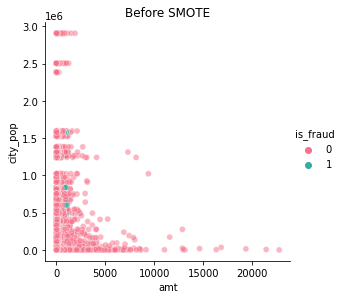

In [84]:
## Step 7: Choose two features & plot before & after SMOTE

plt.figure(figsize=(10,6), dpi=150)

sns.relplot(x="amt", y="city_pop", hue="is_fraud", alpha=.5, palette="husl",
            height=4, data=df)
plt.title('Before SMOTE')

Text(0.5, 1.0, 'After SMOTE')

<Figure size 1500x900 with 0 Axes>

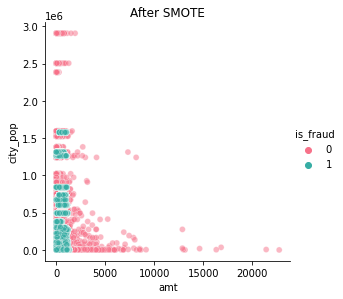

In [86]:
after = X_SMOTE.join(y_SMOTE)
plt.figure(figsize=(10,6), dpi=150)

sns.relplot(x="amt", y="city_pop", hue="is_fraud", alpha=.5, palette="husl",
            height=4, data=after)
plt.title('After SMOTE')

In [ ]:
## Thank you!